In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer,StandardScaler
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Sequential,Model
from tensorflow.keras import layers,models

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

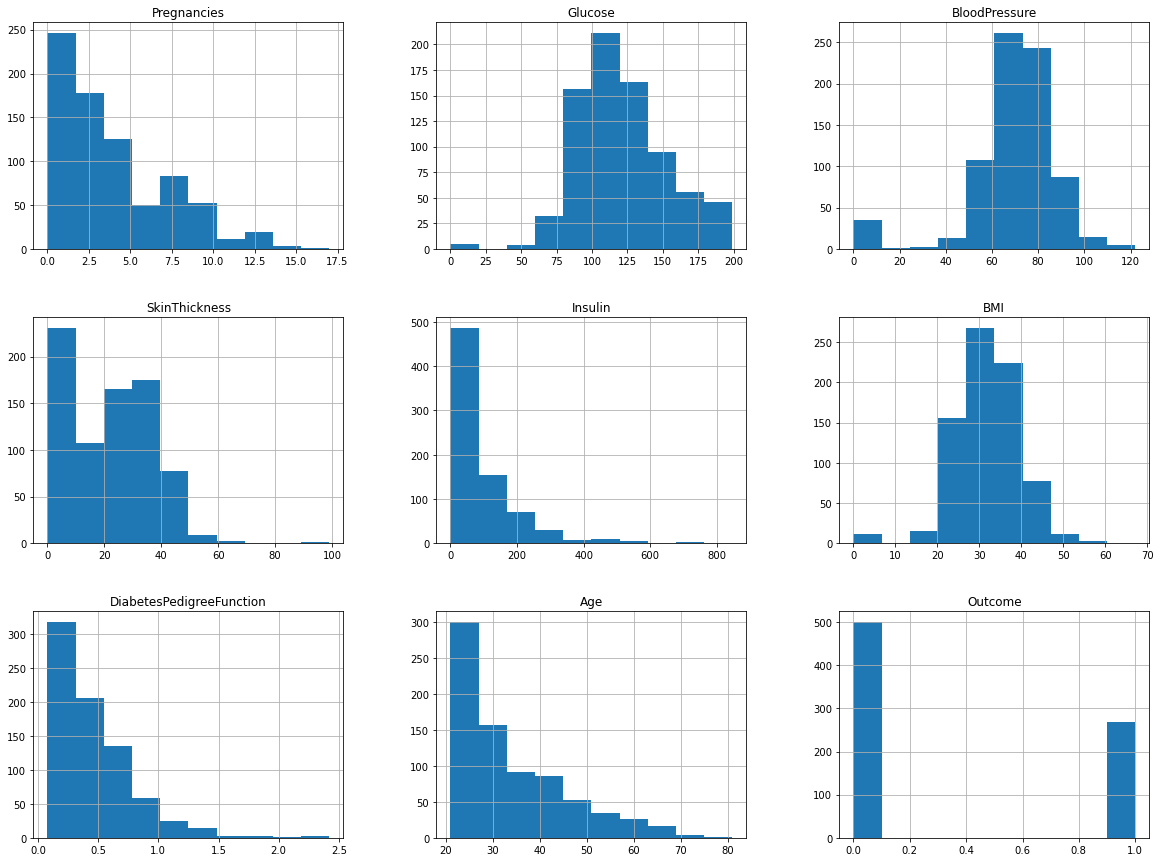

In [7]:
df.hist(figsize=(20,15))

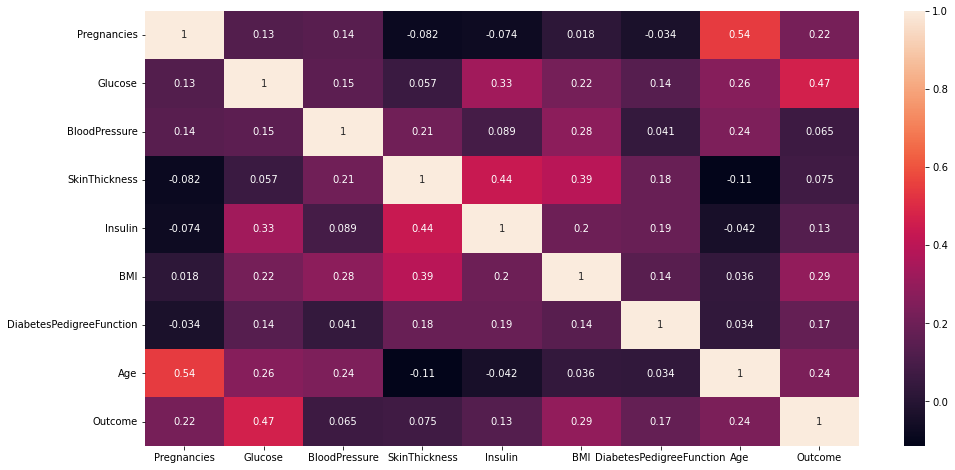

In [8]:
plt.figure(1 , figsize = (16 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [9]:
#Glucose levels had the highest effect on the outcome.
#pregnancies is correlated to age.

In [10]:
X = df.iloc[:,0:8]
y = df["Outcome"]

In [11]:
std = StandardScaler()
X_std = std.fit_transform(X)
X_train, X_validation, y_train, y_validation = train_test_split(X_std, y, test_size=0.2)


In [12]:
model = Sequential()

In [13]:

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(25,activation='relu'))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5,validation_data=(X_validation, y_validation))

Epoch 1/100
123/123 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7345 - val_loss: 0.5208 - val_accuracy: 0.7468
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.7720 - val_loss: 0.5271 - val_accuracy: 0.7468
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7769 - val_loss: 0.5294 - val_accuracy: 0.7403
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7948 - val_loss: 0.5258 - val_accuracy: 0.7662
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8013 - val_loss: 0.5337 - val_accuracy: 0.7403
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8078 - val_loss: 0.5736 - val_accuracy: 0.7403
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8176 - val_loss: 0.5641 - val_accuracy: 0.7532

Epoch 58/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 0.9984 - val_loss: 2.2629 - val_accuracy: 0.6883
Epoch 59/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0139 - accuracy: 0.9984 - val_loss: 2.3911 - val_accuracy: 0.6753
Epoch 60/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9902 - val_loss: 2.4216 - val_accuracy: 0.6688
Epoch 61/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 2.4052 - val_accuracy: 0.7013
Epoch 62/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 2.4352 - val_accuracy: 0.6818
Epoch 63/100
123/123 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 2.5042 - val_accuracy: 0.6753
Epoch 64/100
123/123 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9365 - val_loss: 1.9320 - val_accuracy:

In [16]:
result = model.evaluate(X_validation,y_validation)

5/5 [==============================] - 0s 1ms/step - loss: 2.6148 - accuracy: 0.6948


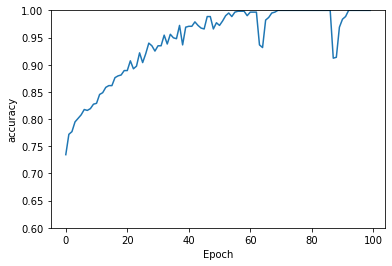

In [17]:
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'], label='accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


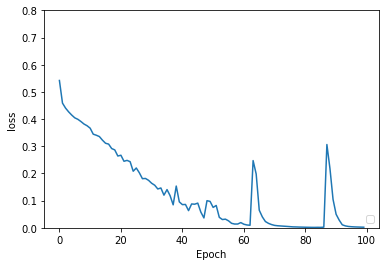

In [18]:
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.8])
plt.legend(loc="lower right")
plt.plot(history.history['loss'],label='loss')